In [0]:
import pandas as pd
from sklearn.utils import shuffle


In [0]:
data=pd.read_csv("train.csv")#Making it Relative Path -Mayank
data_ori=data.copy()

In [0]:
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
        
%matplotlib inline

In [4]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [0]:
def datetime(df):
  from datetime import datetime
  df['datetime'] = pd.to_datetime(df['datetime'])
  df['year'] = df['datetime'].dt.year 
  df['day'] = df['datetime'].dt.day 
  df['hour'] = df['datetime'].dt.hour
  df['Day of Week'] = df['datetime'].apply(lambda time: time.dayofweek)
  return df

In [0]:
data_ori=datetime(data_ori)

In [0]:
data_ori=data_ori.drop('datetime',axis=1)


In [0]:
def normalize(df,columns):
    result=df.copy()
    for feature_name in columns :
        mean_value = df[feature_name].mean()
        std_value = df[feature_name].std()
        result[feature_name] = (df[feature_name] - mean_value) / std_value
        
    return result

In [0]:
data_ori=normalize(data_ori,["temp","atemp","humidity","windspeed"])



In [0]:



def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data



In [0]:


data_ori = dummy_data(data_ori, ["season","weather","hour"])



In [12]:
data_ori.shape

(10886, 44)

In [0]:

data=shuffle(data_ori,random_state=1)
nrows = len(data_ori)
training_validation_rows = int(nrows*0.8)
data=data_ori[0:training_validation_rows-1]
test1=data_ori[training_validation_rows:]

In [14]:
data.shape

(8707, 44)

In [15]:
test1.shape

(2178, 44)

In [0]:
import seaborn as sns

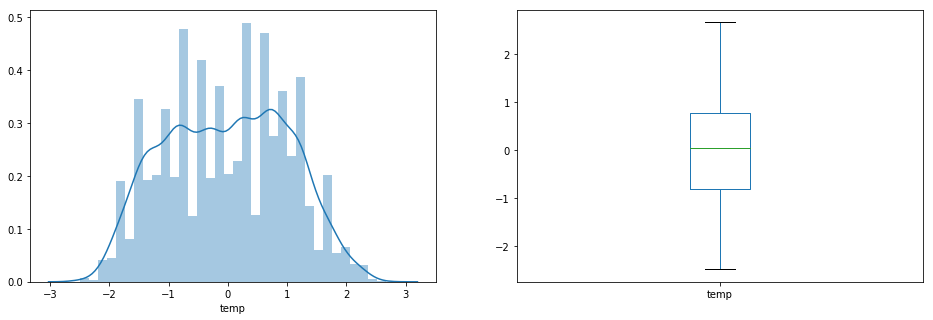

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['temp']); 
plt.subplot(122)
data['temp'].plot.box(figsize=(16,5)) 
plt.show()

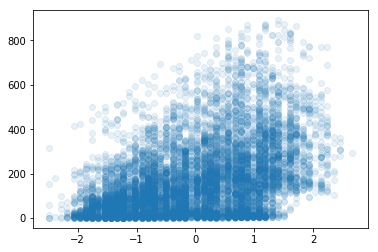

In [18]:
plt.scatter(data['temp'],data['count'],alpha=0.1,
            cmap='viridis')

In [19]:
data['temp'].describe()

count    8707.000000
mean       -0.018653
std         1.028302
min        -2.491258
25%        -0.807391
50%         0.034542
75%         0.771234
max         2.665584
Name: temp, dtype: float64

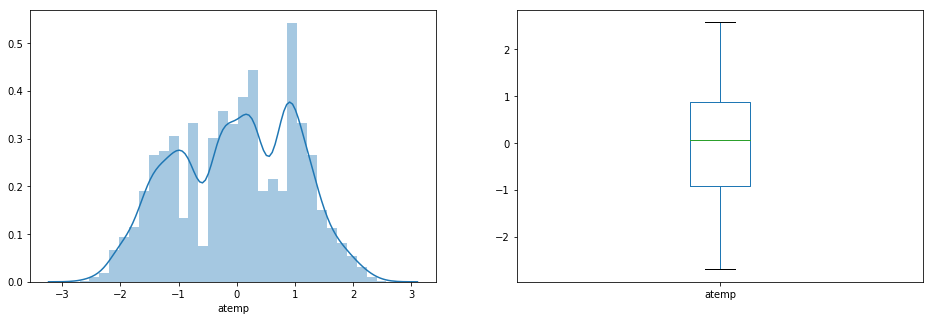

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['atemp']); 
plt.subplot(122)
data['atemp'].plot.box(figsize=(16,5)) 
plt.show()

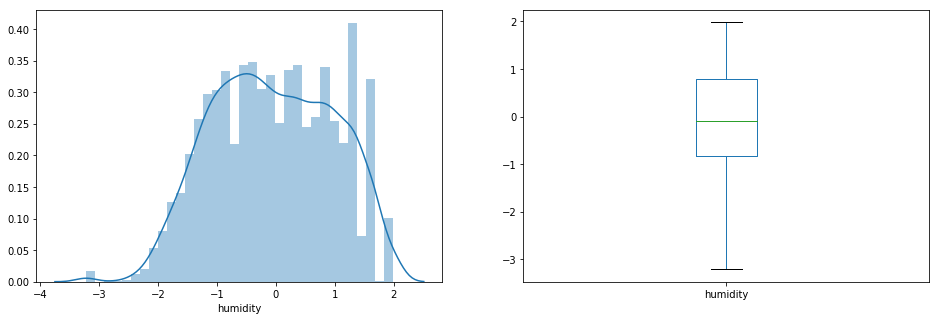

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['humidity']); 
plt.subplot(122)
data['humidity'].plot.box(figsize=(16,5)) 
plt.show()

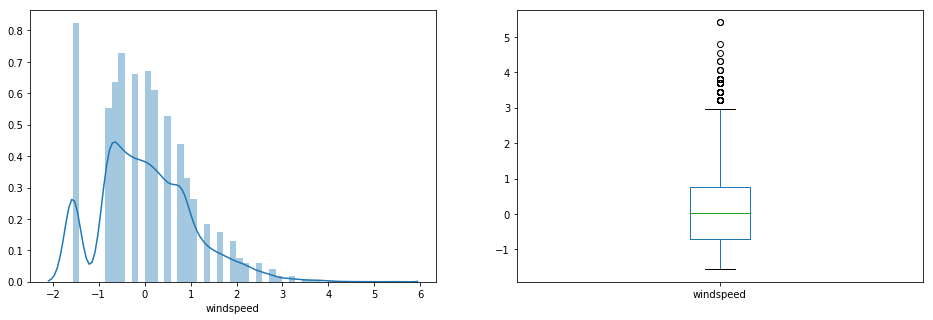

In [22]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['windspeed']); 
plt.subplot(122)
data['windspeed'].plot.box(figsize=(16,5)) 
plt.show()

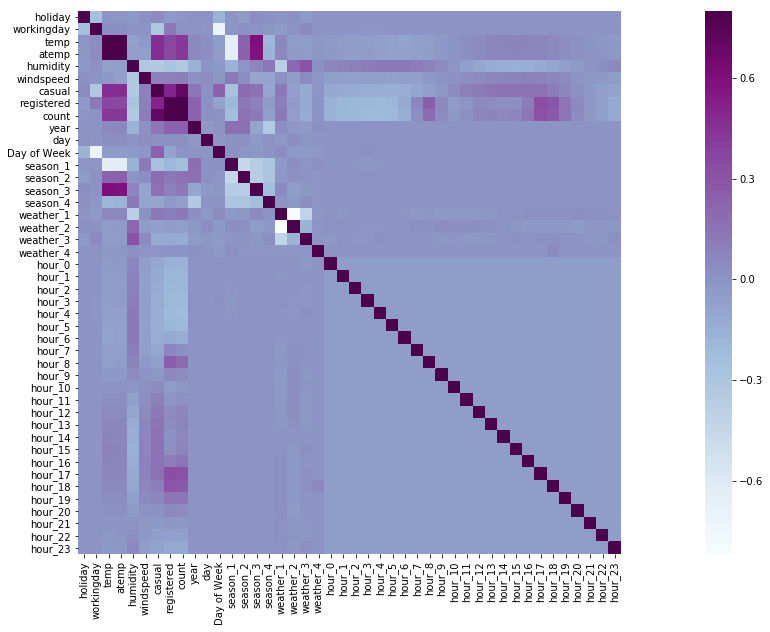

In [23]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [0]:
import numpy as np

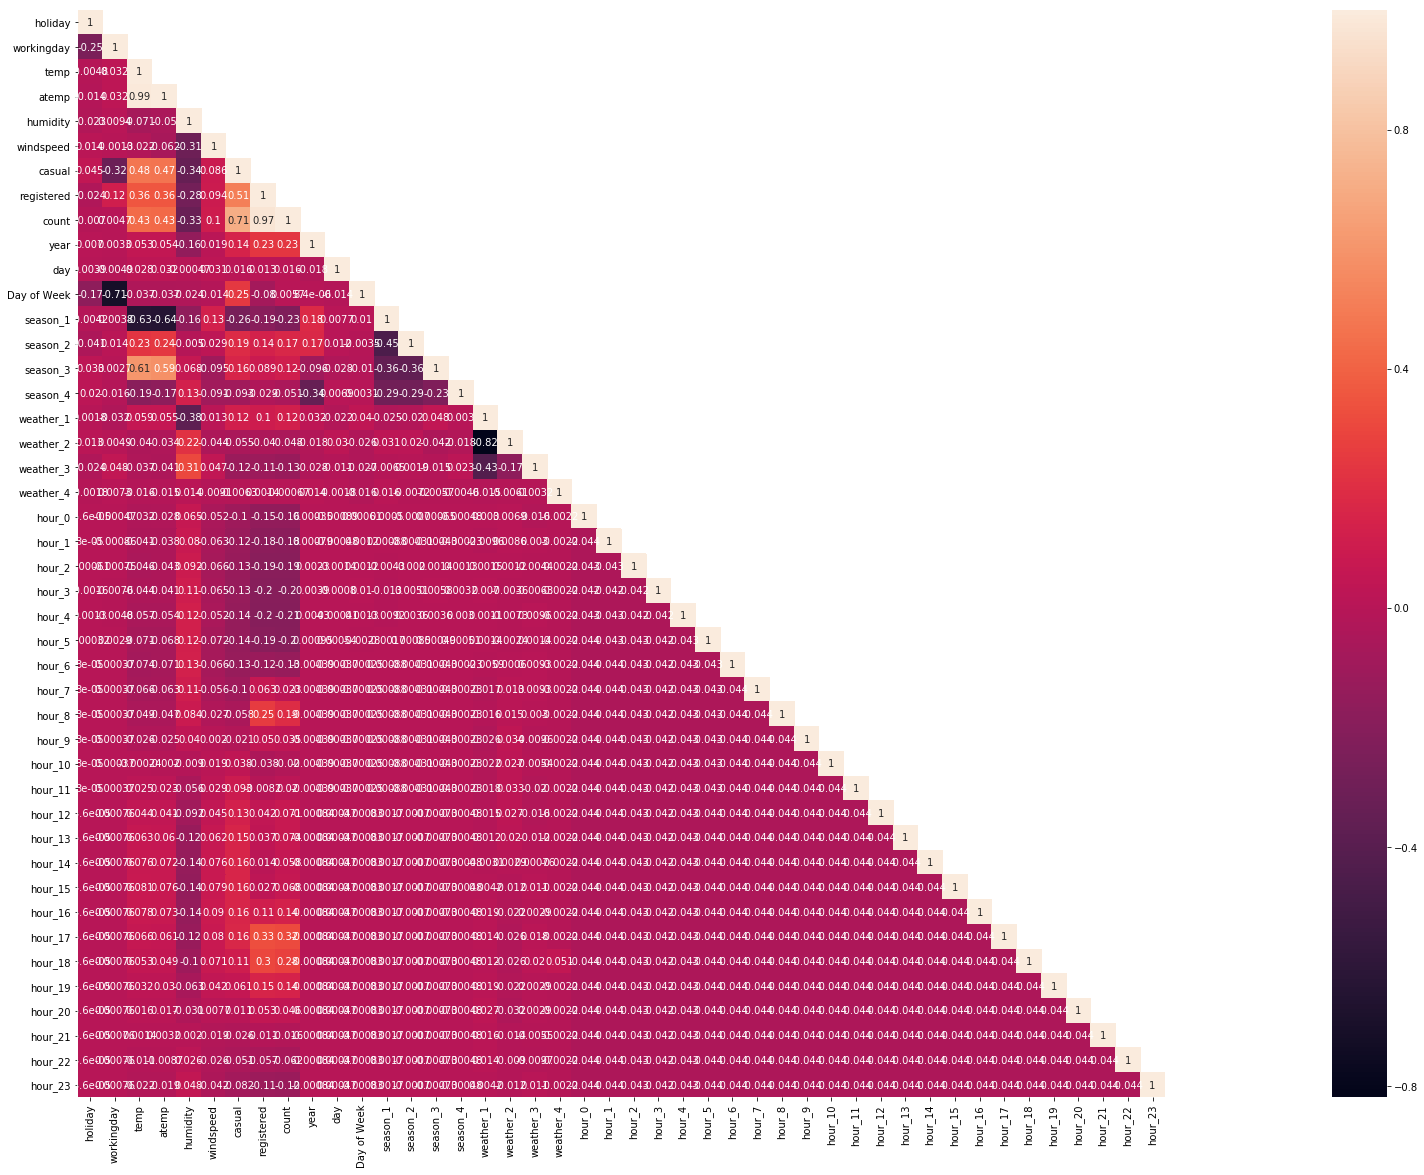

In [25]:
corrMat = data.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots(figsize=(60, 20))
sns.heatmap(corrMat, mask=mask,vmax=1., square=True,annot=True)

In [26]:
data.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,day,Day of Week,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
holiday,1.000000,-0.246736,-0.004834,-0.014097,-0.023067,0.013500,0.045411,-0.024476,-0.006998,0.007004,0.003908,-0.169946,-0.004153,-0.040925,0.032666,0.020243,0.001843,0.013390,-0.024208,-0.001801,-0.000066,0.000030,0.000613,-0.001597,0.001306,0.000320,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,-0.000066,-0.000066,-0.000066,-0.000066,-0.000066,-0.000066,-0.000066,-0.000066,-0.000066,-0.000066,-0.000066,-0.000066
workingday,-0.246736,1.000000,0.031635,0.032455,0.009373,-0.001300,-0.318682,0.117624,0.004650,0.003334,-0.004921,-0.711607,-0.003844,0.013670,0.002673,-0.015604,-0.032492,0.004868,0.047856,0.007297,-0.000473,-0.000864,-0.000747,-0.007649,-0.004793,0.002909,0.000369,0.000369,0.000369,0.000369,0.000369,0.000369,0.000759,0.000759,0.000759,0.000759,0.000759,0.000759,0.000759,0.000759,0.000759,0.000759,0.000759,0.000759
temp,-0.004834,0.031635,1.000000,0.992473,-0.071111,-0.022209,0.476114,0.358691,0.431925,0.053485,0.028118,-0.036863,-0.629844,0.231149,0.607127,-0.187248,0.058907,-0.040240,-0.037125,-0.015900,-0.031763,-0.041114,-0.045825,-0.044119,-0.056930,-0.070849,-0.073945,-0.065840,-0.049278,-0.025550,-0.000236,0.024902,0.044079,0.063318,0.075636,0.080563,0.077865,0.066310,0.052760,0.032465,0.015866,0.001378,-0.010940,-0.022143
atemp,-0.014097,0.032455,0.992473,1.000000,-0.049764,-0.062418,0.473214,0.355784,0.428701,0.053881,0.032173,-0.036619,-0.635112,0.242269,0.586051,-0.170723,0.055375,-0.033942,-0.041026,-0.014939,-0.028037,-0.038342,-0.042802,-0.040724,-0.054499,-0.068308,-0.071333,-0.063460,-0.047013,-0.024634,-0.001958,0.022862,0.041198,0.060409,0.072057,0.076286,0.072555,0.061207,0.049111,0.030448,0.016810,0.003171,-0.008725,-0.019476
humidity,-0.023067,0.009373,-0.071111,-0.049764,1.000000,-0.313717,-0.336905,-0.280213,-0.327314,-0.157083,-0.000472,-0.024445,-0.159563,-0.005020,0.068080,0.131381,-0.377407,0.215660,0.307774,0.013616,0.065304,0.080145,0.091837,0.106581,0.124488,0.123441,0.129485,0.111172,0.084490,0.040107,-0.009000,-0.055599,-0.092250,-0.123789,-0.140156,-0.144612,-0.142049,-0.123236,-0.102006,-0.062574,-0.030772,0.001991,0.026105,0.048180
windspeed,0.013500,-0.001300,-0.022209,-0.062418,-0.313717,1.000000,0.086270,0.093694,0.101833,0.019263,0.030639,-0.013639,0.127772,0.029080,-0.094937,-0.091098,0.012905,-0.043889,0.047391,-0.009094,-0.052224,-0.062935,-0.066411,-0.065376,-0.051756,-0.071912,-0.066110,-0.056027,-0.027480,0.002034,0.019379,0.028851,0.045027,0.062422,0.076432,0.079051,0.089890,0.080086,0.070701,0.041574,0.007682,-0.018752,-0.026133,-0.042005
casual,0.045411,-0.318682,0.476114,0.473214,-0.336905,0.086270,1.000000,0.511498,0.708558,0.141572,0.016251,0.246750,-0.257885,0.189003,0.157193,-0.092867,0.120564,-0.054751,-0.120545,-0.006256,-0.104678,-0.120782,-0.125924,-0.132326,-0.140227,-0.141441,-0.129972,-0.100238,-0.058148,-0.020670,0.038498,0.092527,0.127065,0.148930,0.160137,0.159457,0.155781,0.161629,0.109365,0.060575,0.010794,-0.025704,-0.051209,-0.082038
registered,-0.024476,0.117624,0.358691,0.355784,-0.280213,0.093694,0.511498,1.000000,0.968782,0.234014,0.013447,-0.079781,-0.193165,0.135718,0.089000,-0.029333,0.102743,-0.039815,-0.113780,0.001382,-0.153404,-0.177020,-0.187535,-0.196004,-0.203771,-0.189355,-0.115510,0.062792,0.254820,0.050398,-0.037874,-0.008156,0.041818,0.037294,0.014039,0.027352,0.114120,0.329302,0.298382,0.154290,0.052590,-0.010793,-0.057349,-0.112375
count,-0.006998,0.004650,0.431925,0.428701,-0.327314,0.101833,0.708558,0.968782,1.000000,0.233020,0.015731,0.005673,-0.233032,0.165982,0.118440,-0.050882,0.119158,-0.048493,-0.128216,-0.000670,-0.156178,-0.180217,-0.190336,-0.199138,-0.207796,-0.

In [27]:
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,day,Day of Week,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,-1.333599,-1.092687,0.993167,-1.567682,3,13,16,2011,1,5,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-1.438841,-1.182367,0.941206,-1.567682,8,32,40,2011,1,5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,-1.438841,-1.182367,0.941206,-1.567682,5,27,32,2011,1,5,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,-1.333599,-1.092687,0.681399,-1.567682,3,10,13,2011,1,5,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,-1.333599,-1.092687,0.681399,-1.567682,0,1,1,2011,1,5,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:

def split_valid_test_data(data, fraction=0.2):
    data_y = data["count"]
    
    

    data_x = data.drop(["count","casual","registered"], axis=1)

    

    return data_x.values, data_y

data_x, data_y = split_valid_test_data(data)


In [29]:
data_x.shape

(8707, 41)

In [30]:
data.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'year', 'day', 'Day of Week',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23'],
      dtype='object')

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import Adam,SGD,RMSprop,Adagrad

Using TensorFlow backend.


In [0]:

  
adam = Adam(lr=1e-3, decay=1e-3 / 200)
 
from keras import backend
 
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
  
  
    
   

In [38]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = data_x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='softplus'))

# Compile the network :
NN_model.compile(loss='mean_squared_logarithmic_error', optimizer=adam, metrics=['mean_absolute_error','mean_squared_error',rmse])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               5376      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 170,241
Trainable params: 170,241
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose =1, save_best_only = True, mode ='auto')
early_stop=EarlyStopping(monitor='val_loss',patience=10)
callbacks_list = [checkpoint,early_stop]

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
 
 
  plt.legend()
  plt.show()

In [40]:
history=NN_model.fit(data_x, data_y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 6965 samples, validate on 1742 samples
Epoch 1/100
6965/6965 [==============================] - 1s 182us/step - loss: 2.0664 - mean_absolute_error: 111.4386 - mean_squared_error: 24995.8460 - rmse: 111.4386 - val_loss: 2.3541 - val_mean_absolute_error: 220.9896 - val_mean_squared_error: 85658.3499 - val_rmse: 220.9896

Epoch 00001: val_loss improved from inf to 2.35407, saving model to Weights-001--2.35407.hdf5
Epoch 2/100
6965/6965 [==============================] - 1s 126us/step - loss: 1.9553 - mean_absolute_error: 111.0698 - mean_squared_error: 24931.7665 - rmse: 111.0698 - val_loss: 2.5446 - val_mean_absolute_error: 225.7547 - val_mean_squared_error: 89527.1618 - val_rmse: 225.7547

Epoch 00002: val_loss did not improve from 2.35407
Epoch 3/100
6965/6965 [==============================] - 1s 125us/step - loss: 1.8335 - mean_absolute_error: 107.6428 - mean_squared_error: 23926.4963 - rmse: 107.6428 - val_loss: 1.4947 - val_mean_absolute_error: 182.1310 - val_mean_squared_e

In [41]:
data['count'].describe()

count    8707.000000
mean      174.409670
std       166.438566
min         1.000000
25%        38.000000
50%       130.000000
75%       259.000000
max       891.000000
Name: count, dtype: float64

In [0]:
test=pd.read_csv("test.csv")
test_original=test.copy()

In [0]:
test.shape

(6493, 9)

In [0]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [0]:
test['datetime'] = pd.to_datetime(test['datetime'], errors='coerce')

In [0]:
test['year'] = test['datetime'].dt.year 
#test['month'] = test['datetime'].dt.month 
test['day'] = test['datetime'].dt.day 
test['hour'] = test['datetime'].dt.hour

In [0]:
test=test.drop('datetime',axis=1)

In [0]:
test=normalize(test,["temp","atemp","humidity","windspeed"])

In [0]:
test = dummy_data(test, ["season","weather","hour"])

In [0]:
test.shape

(6493, 40)

In [0]:
test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'day', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [0]:


test1_x, test1_y = split_valid_test_data(test1)

In [43]:
scores=NN_model.evaluate(test1_x,test1_y)


2178/2178 [==============================] - 0s 37us/step


In [44]:
print(NN_model.metrics_names)

['loss', 'mean_absolute_error', 'mean_squared_error', 'rmse']


In [0]:
test1_loss=scores[0]
test1_mae=scores[1]
test1_mse=scores[2]
test1_rmse=scores[3]

In [46]:
test1_mae

110.55345133491565

In [0]:
#making predictions
#prediction=NN_model.predict(test)

In [0]:

evaluation=test_original['datetime'].to_frame()
evaluation["count"]=prediction
evaluation[:10]

,datetime,count
0,2011-01-20 00:00:00,12.484183
1,2011-01-20 01:00:00,5.482817
2,2011-01-20 02:00:00,3.354281
3,2011-01-20 03:00:00,2.179120
4,2011-01-20 04:00:00,2.121344
5,2011-01-20 05:00:00,10.160122
6,2011-01-20 06:00:00,55.021420
7,2011-01-20 07:00:00,150.138443
8,2011-01-20 08:00:00,280.271149
9,2011-01-20 09:00:00,132.132675


In [0]:
evaluation["count"] = evaluation["count"].astype(int)
evaluation["count"]

0        14
1         7
2         4
3         2
4         2
5        13
6        47
7       152
8       262
9       136
10       69
11       74
12      107
13       86
14       79
15       84
16      119
17      259
18      203
19      141
20       91
21       68
22       49
23       32
24       12
25        5
26        3
27        2
28        2
29       12
       ... 
6463     99
6464    115
6465     59
6466     51
6467     38
6468     29
6469     13
6470      6
6471      3
6472      2
6473      2
6474     12
6475     45
6476    133
6477    223
6478    131
6479     61
6480     66
6481     80
6482     86
6483     78
6484     85
6485    110
6486    244
6487    222
6488    145
6489    103
6490     90
6491     73
6492     42
Name: count, Length: 6493, dtype: int64

In [0]:
evaluation.to_csv("submissionv19.csv",index=False)